In [1]:
import numpy as np
import pandas as pd
import time
import os
import re
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ExpW

In [103]:
frame = pd.read_csv('ExpW_OpenFace_result_with_expression_gender_race_age.csv')
frame.head()

,ImageName,Expression,race_preds,gender_preds,age_preds,race_scores,gender_scores,age_scores,face,confidence,...,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,angry_actor_104_0.jpg,0,Black,Male,20-29,[0.01164725 0.5489195 0.06282789 0.03017501 0...,[0.97893476 0.02106526],[0.00264865 0.03285832 0.07209051 0.29417548 0...,0.0,0.875,...,0.00,0.41,3.61,0.54,1.10,0.68,0.00,2.23,0.00,0.17
1,angry_actor_109_0.jpg,0,Middle Eastern,Male,10-19,[0.07172439 0.03716405 0.07634144 0.09301798 0...,[0.9886888 0.01131118],[5.5791729e-04 2.5763142e-01 4.3460685e-01 2.5...,0.0,0.925,...,1.16,0.76,0.77,1.12,0.04,1.38,0.00,1.20,0.00,0.00
2,angry_actor_120_1.jpg,2,White,Male,20-29,[0.38725546 0.02379545 0.04428627 0.3587341 0...,[0.7577495 0.24225047],[0.00361199 0.02466666 0.0458126 0.62581354 0...,1.0,0.925,...,0.06,0.00,1.51,0.00,0.00,0.00,0.00,1.09,0.51,0.10
3,angry_actor_13_0.jpg,3,East Asian,Female,20-29,[0.05252786 0.06977403 0.0932842 0.40103135 0...,[0.46038443 0.5396156 ],[0.00304344 0.0880671 0.22934933 0.39468738 0...,0.0,0.975,...,0.99,0.00,0.00,0.36,0.56,0.00,0.13,0.96,1.02,0.00
4,angry_actor_132_0.jpg,0,White,Female,20-29,[0.29344454 0.09408408 0.14308809 0.2740257 0...,[0.44868255 0.55131745],[0.00321869 0.0189087 0.0630689 0.40079823 0...,0.0,0.875,...,0.05,0.00,0.13,0.00,0.76,0.00,0.25,0.00,0.06,0.00


In [104]:
frame.loc[frame['Expression'] == 0, 'Expression'] = 'angry'
frame.loc[frame['Expression'] == 1, 'Expression'] = 'disgust'
frame.loc[frame['Expression'] == 2, 'Expression'] = 'fear'
frame.loc[frame['Expression'] == 3, 'Expression'] = 'happy'
frame.loc[frame['Expression'] == 4, 'Expression'] = 'sad'
frame.loc[frame['Expression'] == 5, 'Expression'] = 'surprise'
frame.loc[frame['Expression'] == 6, 'Expression'] = 'neutral'
frame.Expression.value_counts()

neutral     33927
happy       28893
sad         10429
surprise     6880
disgust      3805
angry        3602
fear         1064
Name: Expression, dtype: int64

In [105]:
frame['Angry'] = (frame['Expression'] =='angry').astype(int)
frame['Disgust'] = (frame['Expression'] == 'disgust').astype(int)
frame['Fear'] = (frame['Expression'] == 'fear').astype(int)
frame['Happy'] = (frame['Expression'] =='happy').astype(int)
frame['Sad'] = (frame['Expression'] == 'sad').astype(int)
frame['Surprise'] = (frame['Expression'] == 'surprise').astype(int)
frame['Neutral'] = (frame['Expression'] == 'neutral').astype(int)

In [106]:
frame = frame.dropna()
frame.shape

(85355, 188)

In [107]:
frame.age_preds.value_counts()

20-29           51484
30-39           11138
3-9              5994
40-49            5615
10-19            5147
more than 70     2601
60-69            2538
0-2               420
50-59             418
Name: age_preds, dtype: int64

In [108]:
print(list(frame.columns))

['ImageName', 'Expression', 'race_preds', 'gender_preds', 'age_preds', 'race_scores', 'gender_scores', 'age_scores', 'face', 'confidence', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'y_0', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5', 'y_6', 'y_7', 'y_8', 'y_9', 'y_10', 'y_11', 'y_12', 'y_13', 'y_14', 'y_15', 'y_16', 'y_17', 'y_18', 'y_19

# ExpW expression label：
- "0" "angry"
- "1" "disgust"
- "2" "fear"
- "3" "happy"
- "4" "sad"
- "5" "surprise"
- "6" "neutral"

In [109]:
frame.loc[frame['Expression'] == 0, 'Expression'] = 'angry'
frame.loc[frame['Expression'] == 1, 'Expression'] = 'disgust'
frame.loc[frame['Expression'] == 2, 'Expression'] = 'fear'
frame.loc[frame['Expression'] == 3, 'Expression'] = 'happy'
frame.loc[frame['Expression'] == 4, 'Expression'] = 'sad'
frame.loc[frame['Expression'] == 5, 'Expression'] = 'surprise'
frame.loc[frame['Expression'] == 6, 'Expression'] = 'neutral'
frame.Expression.value_counts()

neutral     32384
happy       28252
sad          9853
surprise     6666
disgust      3719
angry        3494
fear          987
Name: Expression, dtype: int64

In [110]:

frame['Angry'] = (frame['Expression'] =='angry').astype(int)
frame['Disgust'] = (frame['Expression'] == 'disgust').astype(int)
frame['Fear'] = (frame['Expression'] == 'fear').astype(int)
frame['Happy'] = (frame['Expression'] =='happy').astype(int)
frame['Sad'] = (frame['Expression'] == 'sad').astype(int)
frame['Surprise'] = (frame['Expression'] == 'surprise').astype(int)
frame['Neutral'] = (frame['Expression'] == 'neutral').astype(int)

In [111]:
frame = frame.dropna()
frame.shape

(85355, 188)

# Using the optimal threshold to re-create the AU presence

In [112]:
AU_intensity_OpenFace_common2 = ['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU09_r', 'AU10_r', 
                'AU12_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU25_r', 'AU26_r']
optimal_threshold = np.array([4.4, 4.8, 2.4, 3.7, 1.8, 2.8, 0.2, 1.3, 1.3, 5. , 5. , 0.7, 5. ])
for i in range(len(AU_intensity_OpenFace_common2)):
    frame[AU_intensity_OpenFace_common2[i] + "_c"] = frame[AU_intensity_OpenFace_common2[i]].apply(lambda x: 0 if x <= optimal_threshold[i] else 1)

frame.shape

(85355, 201)

In [113]:
print(list(frame.columns))

['ImageName', 'Expression', 'race_preds', 'gender_preds', 'age_preds', 'race_scores', 'gender_scores', 'age_scores', 'face', 'confidence', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'y_0', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5', 'y_6', 'y_7', 'y_8', 'y_9', 'y_10', 'y_11', 'y_12', 'y_13', 'y_14', 'y_15', 'y_16', 'y_17', 'y_18', 'y_19

In [114]:

frame['AU6and12_c'] = frame.AU06_c.apply(int).apply(str) + frame.AU12_c.apply(int).apply(str)
frame.AU6and12_c.value_counts()

00    33062
11    26450
10    15317
01    10526
Name: AU6and12_c, dtype: int64

In [115]:
frame['AU6and12_r_c'] = frame.AU06_r_c.apply(str) + frame.AU12_r_c.apply(str)
frame.AU6and12_r_c.value_counts()

00    61183
01    13396
11     8145
10     2631
Name: AU6and12_r_c, dtype: int64

# P(expression|AU1, male) =? P(expression|AU1, female)

In [116]:
def map_age(num):
    if num == 1:
        return 'less than 40'
    else:
        return 'more than 40'

In [117]:
# age label
frame.loc[frame['age_preds'] == '0-2', 'age'] = 1
frame.loc[frame['age_preds'] == '3-9', 'age'] = 1
frame.loc[frame['age_preds'] == '10-19', 'age'] = 1
frame.loc[frame['age_preds'] == '20-29', 'age'] = 1
frame.loc[frame['age_preds'] == '30-39', 'age'] = 1
frame.loc[frame['age_preds'] == '40-49', 'age'] = 2
frame.loc[frame['age_preds'] == '50-59', 'age'] = 2
frame.loc[frame['age_preds'] == '60-69', 'age'] = 2
frame.loc[frame['age_preds'] == 'more than 70', 'age'] = 2
frame.age.value_counts()

1.0    74183
2.0    11172
Name: age, dtype: int64

In [118]:
frame['Age'] = frame['age'].apply(map_age)
frame.Age.value_counts()

less than 40    74183
more than 40    11172
Name: Age, dtype: int64

In [119]:
frame_1 = frame.loc[frame['age'] == 1]
frame_2 = frame.loc[frame['age'] == 2]
print(frame_1.shape)
print(frame_2.shape)

(74183, 205)
(11172, 205)


In [120]:
frame_list = [frame_1, frame_2]
name_list = ['less than 40', 'more than 40']

## Happiness

In [121]:
for i in range(len(frame_list)):
    print(frame_list[i].Happy.mean(), name_list[i], frame_list[i].shape[0])

0.3325964169688473 less than 40 74183
0.3203544575725027 more than 40 11172


In [122]:
for i in range(len(frame_list)):
    print(frame_list[i].AU06_r_c.mean(), name_list[i], frame_list[i].shape[0])

0.12256177291293154 less than 40 74183
0.15073397780164696 more than 40 11172


In [123]:
for i in range(len(frame_list)):
    print(frame_list[i].AU12_r_c.mean(), name_list[i], frame_list[i].shape[0])

0.2517018723966407 less than 40 74183
0.2568027210884354 more than 40 11172


In [124]:
for i in range(len(frame_list)):
    print(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index'), name_list[i], frame_list[i].shape[0])

Happy                0         1
AU6and12_r_c                    
00            0.813418  0.186582
01            0.283892  0.716108
10            0.749311  0.250689
11            0.167486  0.832514 less than 40 74183
Happy                0         1
AU6and12_r_c                    
00            0.809299  0.190701
01            0.394383  0.605617
10            0.726269  0.273731
11            0.215272  0.784728 more than 40 11172


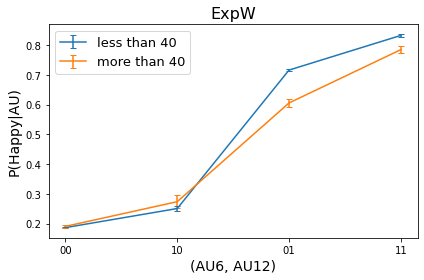

In [125]:
list_00 = []
list_01 = []
list_10 = []
list_11 = []

list_00_n = []
list_01_n = []
list_10_n = []
list_11_n = []

fig = plt.figure(figsize=(6,4))
ax = fig.gca()
for i in range(len(frame_list)):
    list_00.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['00',1])
    list_01.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['01',1])
    list_10.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['10',1])
    list_11.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['11',1])
    
    list_00_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['00','All'])
    list_01_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['01','All'])
    list_10_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['10','All'])
    list_11_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['11','All'])
    
result_df = pd.DataFrame({"00": list_00, "10": list_10, "01": list_01, "11": list_11,
                         "00_n": list_00_n, "10_n": list_10_n, "01_n": list_01_n, "11_n": list_11_n}, index = name_list)
result_df['00_std'] = np.sqrt(result_df['00'] * (1-result_df['00']) / result_df['00_n'])
result_df['10_std'] = np.sqrt(result_df['10'] * (1-result_df['10']) / result_df['10_n'])
result_df['01_std'] = np.sqrt(result_df['01'] * (1-result_df['01']) / result_df['01_n'])
result_df['11_std'] = np.sqrt(result_df['11'] * (1-result_df['11']) / result_df['11_n'])
result_df
for index, row in result_df.iterrows():
    plt.errorbar(list(result_df.columns)[:4], list(row)[:4], yerr = list(row)[8:], label = index, capsize = 3)
plt.legend(fontsize = 13)
plt.xlabel('(AU6, AU12)', fontsize = 14)
plt.ylabel('P(Happy|AU)', fontsize = 14)
plt.title('ExpW', fontsize = 16)
plt.tight_layout()
plt.savefig('age_race_bias_plots/age_2_groups_graphs/ExpW_happy_2_all.pdf')
plt.show()

In [126]:
result_df

,00,10,01,11,00_n,10_n,01_n,11_n,00_std,10_std,01_std,11_std
less than 40,0.186582,0.250689,0.716108,0.832514,53333,2178,11758,6914,0.001687,0.009287,0.004158,0.004491
more than 40,0.190701,0.273731,0.605617,0.784728,7850,453,1638,1231,0.004434,0.020949,0.012075,0.011715


In [127]:
result_df.loc['less than 40',:]-result_df.loc['more than 40',:]

00           -0.004118
10           -0.023042
01            0.110492
11            0.047786
00_n      45483.000000
10_n       1725.000000
01_n      10120.000000
11_n       5683.000000
00_std       -0.002747
10_std       -0.011662
01_std       -0.007917
11_std       -0.007224
dtype: float64

In [28]:
for AU_comb in ['00','10', '01', '11']:
    print(AU_comb)
    combined_df = pd.DataFrame()
    for i in range(len(frame_list)):
        combined_df = combined_df.append(pd.crosstab(frame_list[i][frame_list[i].AU6and12_r_c == AU_comb].age, frame_list[i][frame_list[i].AU6and12_r_c == AU_comb].Happy))
    combined_df
    combined_df["row_totals"] = combined_df[0] + combined_df[1]
    combined_df.loc["col_totals"] = combined_df.sum()
    combined_df
    observed = combined_df.iloc[0:-1,0:-1]   # Get table without totals for later use

    expected =  np.outer(combined_df["row_totals"][0:-1],
                     combined_df.loc["col_totals"][0:-1]) / combined_df.loc['col_totals', 'row_totals']

    expected = pd.DataFrame(expected)
    expected.columns = [0,1]
    expected.index = combined_df.index[:-1]

    if (expected>=5).sum().sum() == (combined_df.shape[0]-1) * (combined_df.shape[1]-1):
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df= (combined_df.shape[0]-2) * (combined_df.shape[1]-2))
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    print(p_value)
    print()

00
0.7629989695385093
0.3823916292917311

10
1.0489724584072508
0.30574385763406675

01
84.00005697679505
0.0

11
16.549094088529635
4.740662789837202e-05



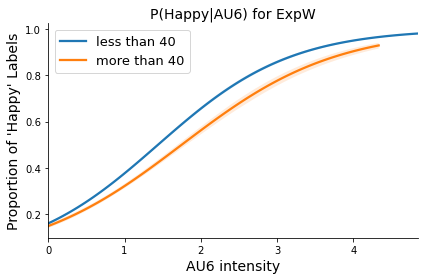

In [36]:
sns.lmplot(x='AU06_r', y='Happy', data=frame, hue = 'Age', logistic=True, scatter = False, hue_order = ['less than 40', 'more than 40'], legend=False, height=4, aspect=6/4)
plt.legend(fontsize=13)
plt.xlabel("AU6 intensity", fontsize=14)
plt.ylabel("Proportion of 'Happy' Labels", fontsize=14)
plt.title('P(Happy|AU6) for ExpW', fontsize=14)
plt.tight_layout()
plt.savefig('age_race_bias_plots/age_2_groups_graphs/ExpW_happy_2_AU6.pdf')
plt.show()

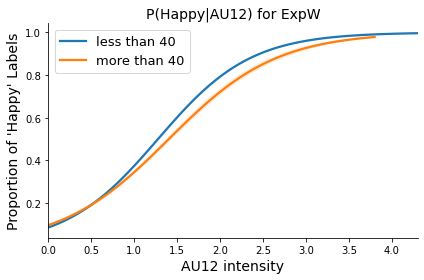

In [37]:
sns.lmplot(x='AU12_r', y='Happy', data=frame, hue = 'Age', logistic=True, scatter = False, hue_order = ['less than 40', 'more than 40'], legend=False, height=4, aspect=6/4)
plt.legend(fontsize=13)
plt.xlabel("AU12 intensity", fontsize=14)
plt.ylabel("Proportion of 'Happy' Labels", fontsize=14)
plt.title('P(Happy|AU12) for ExpW', fontsize=14)
plt.tight_layout()
plt.savefig('age_race_bias_plots/age_2_groups_graphs/ExpW_happy_2_AU12.pdf')
plt.show()

In [34]:
formula = 'Happy ~ AU06_r + AU12_r + Age'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                85355
Model:                            GLM   Df Residuals:                    85351
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -38645.
Date:                Sat, 07 Aug 2021   Deviance:                       77290.
Time:                        19:49:53   Pearson chi2:                 8.35e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.3356    

# RAF-DB

In [151]:
frame = pd.read_csv('RAFDB_OpenFace_result_with_Emotion_and_Gender.csv')
print(frame.shape)
frame.head()

(12214, 54)


,ImageName,face,confidence,Emotion,Happy,Gender,AU01_c,AU02_c,AU04_c,AU05_c,...,AU05_r_c,AU06_r_c,AU09_r_c,AU10_r_c,AU12_r_c,AU15_r_c,AU17_r_c,AU20_r_c,AU25_r_c,AU26_r_c
0,test_0001_aligned.jpg,0,0.925,5,0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,test_0002_aligned.jpg,0,0.975,1,0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,test_0004_aligned.jpg,0,0.825,1,0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,test_0006_aligned.jpg,0,0.875,5,0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,test_0007_aligned.jpg,0,0.975,3,0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,1,0,1,0,0,0,0


## Age Label

Notes:

In "train_XXXXX_manu_attri.txt" / "test_XXXX_manu_attri.txt", the first five lines contain location info (x, y) of 5 landmarks.
The next three lines presents information of gender, race and age attributes respectively:
	
Gender
    
0: male		1: female	2: unsure

Race	

0: Caucasian		1: African-American		2: Asian

Age (5 ranges)	

0: 0-3	 1: 4-19		2: 20-39		3: 40-69		4: 70+

In [152]:
from os import listdir
from os.path import isfile, join
mypath = 'RAF-DB/Basic_Emotion/Annotation/manual'
listdir(mypath)

['train_03396_manu_attri.txt',
 'train_04548_manu_attri.txt',
 'train_03383_manu_attri.txt',
 'test_0461_manu_attri.txt',
 'test_0474_manu_attri.txt',
 'train_11406_manu_attri.txt',
 'test_1490_manu_attri.txt',
 'train_11413_manu_attri.txt',
 'test_1485_manu_attri.txt',
 'train_06054_manu_attri.txt',
 'train_06041_manu_attri.txt',
 'test_2168_manu_attri.txt',
 'train_02367_manu_attri.txt',
 'train_08008_manu_attri.txt',
 'train_02372_manu_attri.txt',
 'train_00426_manu_attri.txt',
 'train_00433_manu_attri.txt',
 'test_0629_manu_attri.txt',
 'train_04715_manu_attri.txt',
 'train_04700_manu_attri.txt',
 'train_08255_manu_attri.txt',
 'train_08240_manu_attri.txt',
 'train_07900_manu_attri.txt',
 'test_2320_manu_attri.txt',
 'test_2335_manu_attri.txt',
 'train_07915_manu_attri.txt',
 'train_06209_manu_attri.txt',
 'train_09949_manu_attri.txt',
 'test_0075_manu_attri.txt',
 'test_0060_manu_attri.txt',
 'train_01966_manu_attri.txt',
 'train_01973_manu_attri.txt',
 'train_03782_manu_attri.txt

In [153]:
len(listdir(mypath))

15339

In [31]:
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
len(onlyfiles)

15339

In [32]:
for index, row in frame.iterrows():
    if index % 1000 == 0: print(index)
    name = row['ImageName'][:-12] + "_manu_attri.txt"
    myfile = open(mypath +"/" + name,"r") 
    frame.loc[index, "Age"] = int(myfile.readlines()[7][0])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000


In [33]:
frame

,ImageName,face,confidence,Emotion,Happy,Gender,AU01_c,AU02_c,AU04_c,AU05_c,...,AU06_r_c,AU09_r_c,AU10_r_c,AU12_r_c,AU15_r_c,AU17_r_c,AU20_r_c,AU25_r_c,AU26_r_c,Age
0,test_0001_aligned.jpg,0,0.925,5,0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,2.0
1,test_0002_aligned.jpg,0,0.975,1,0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1.0
2,test_0004_aligned.jpg,0,0.825,1,0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,2.0
3,test_0006_aligned.jpg,0,0.875,5,0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,2.0
4,test_0007_aligned.jpg,0,0.975,3,0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,1,0,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12209,train_12266_aligned.jpg,0,0.925,7,0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1.0
12210,train_12267_aligned.jpg,0,0.975,7,0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,1.0
12211,train_12268_aligned.jpg,0,0.875,7,0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0.0
12212,train_12269_aligned.jpg,0,0.975,7,0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1.0


In [129]:
frame = pd.read_csv('RAFDB_OpenFace_result_with_Emotion_and_Gender_Age.csv')
frame

,ImageName,face,confidence,Emotion,Happy,Gender,AU01_c,AU02_c,AU04_c,AU05_c,...,AU06_r_c,AU09_r_c,AU10_r_c,AU12_r_c,AU15_r_c,AU17_r_c,AU20_r_c,AU25_r_c,AU26_r_c,Age
0,test_0001_aligned.jpg,0,0.925,5,0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,2.0
1,test_0002_aligned.jpg,0,0.975,1,0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1.0
2,test_0004_aligned.jpg,0,0.825,1,0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,2.0
3,test_0006_aligned.jpg,0,0.875,5,0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,2.0
4,test_0007_aligned.jpg,0,0.975,3,0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,1,0,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12209,train_12266_aligned.jpg,0,0.925,7,0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1.0
12210,train_12267_aligned.jpg,0,0.975,7,0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,1.0
12211,train_12268_aligned.jpg,0,0.875,7,0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0.0
12212,train_12269_aligned.jpg,0,0.975,7,0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1.0


In [130]:
frame = frame.rename(columns={'Age': 'age_preds'})

In [131]:
frame.age_preds.value_counts()

2.0    6805
1.0    2103
3.0    1911
0.0    1102
4.0     293
Name: age_preds, dtype: int64

In [132]:
def map_age_RAFDB(age):
    if age <= 2:
        return 1
    else:
        return 2

frame['Age'] = frame.age_preds.apply(map_age_RAFDB)
frame.Age.value_counts()

1    10010
2     2204
Name: Age, dtype: int64

In [133]:
frame = frame.dropna()
frame.shape

(12214, 56)

In [134]:
frame['AU6and12_c'] = frame.AU06_c.apply(int).apply(str) + frame.AU12_c.apply(int).apply(str)
frame.AU6and12_c.value_counts()

11    6766
00    2619
10    1419
01    1410
Name: AU6and12_c, dtype: int64

In [135]:
frame['AU6and12_r_c'] = frame.AU06_r_c.apply(str) + frame.AU12_r_c.apply(str)
frame.AU6and12_r_c.value_counts()

00    8209
11    1881
01    1545
10     579
Name: AU6and12_r_c, dtype: int64

# P(expression|AU1, male) =? P(expression|AU1, female)

In [136]:
frame['age'] = frame['age_preds']
frame['Age'] = frame['age'].apply(map_age)
frame.Age.value_counts()

more than 40    10111
less than 40     2103
Name: Age, dtype: int64

In [137]:
frame_1 = frame.loc[frame['age'] == 1]
frame_2 = frame.loc[frame['age'] == 2]
print(frame_1.shape)
print(frame_2.shape)

(2103, 59)
(6805, 59)


In [138]:
frame_list = [frame_1, frame_2]
name_list = ['less than 40', 'more than 40']

## Happiness

In [139]:
for i in range(len(frame_list)):
    print(frame_list[i].Happy.mean(), name_list[i], frame_list[i].shape[0])

0.43794579172610554 less than 40 2103
0.34019103600293904 more than 40 6805


In [140]:
for i in range(len(frame_list)):
    print(frame_list[i].AU06_r_c.mean(), name_list[i], frame_list[i].shape[0])

0.16500237755587258 less than 40 2103
0.1745775165319618 more than 40 6805


In [50]:
for i in range(len(frame_list)):
    print(frame_list[i].AU12_r_c.mean(), name_list[i], frame_list[i].shape[0])

0.3019495958155017 less than 40 2103
0.252608376193975 more than 40 6805


In [51]:
for i in range(len(frame_list)):
    print(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index'), name_list[i], frame_list[i].shape[0])

Happy                0         1
AU6and12_r_c                    
00            0.766187  0.233813
01            0.122951  0.877049
10            0.589744  0.410256
11            0.096654  0.903346 less than 40 2103
Happy                0         1
AU6and12_r_c                    
00            0.831914  0.168086
01            0.162935  0.837065
10            0.820513  0.179487
11            0.143169  0.856831 more than 40 6805


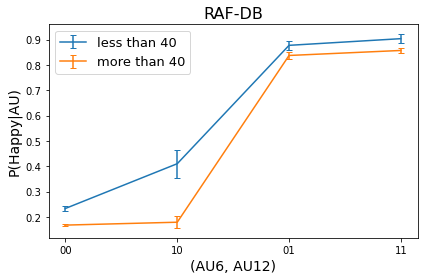

In [141]:
list_00 = []
list_01 = []
list_10 = []
list_11 = []

list_00_n = []
list_01_n = []
list_10_n = []
list_11_n = []

fig = plt.figure(figsize=(6,4))
ax = fig.gca()
for i in range(len(frame_list)):
    list_00.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['00',1])
    list_01.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['01',1])
    list_10.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['10',1])
    list_11.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['11',1])
    
    list_00_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['00','All'])
    list_01_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['01','All'])
    list_10_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['10','All'])
    list_11_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['11','All'])
    
result_df = pd.DataFrame({"00": list_00, "10": list_10, "01": list_01, "11": list_11,
                         "00_n": list_00_n, "10_n": list_10_n, "01_n": list_01_n, "11_n": list_11_n}, index = name_list)
result_df['00_std'] = np.sqrt(result_df['00'] * (1-result_df['00']) / result_df['00_n'])
result_df['10_std'] = np.sqrt(result_df['10'] * (1-result_df['10']) / result_df['10_n'])
result_df['01_std'] = np.sqrt(result_df['01'] * (1-result_df['01']) / result_df['01_n'])
result_df['11_std'] = np.sqrt(result_df['11'] * (1-result_df['11']) / result_df['11_n'])
result_df
for index, row in result_df.iterrows():
    plt.errorbar(list(result_df.columns)[:4], list(row)[:4], yerr = list(row)[8:], label = index, capsize = 3)
plt.legend(fontsize = 13)
plt.xlabel('(AU6, AU12)', fontsize = 14)
plt.ylabel('P(Happy|AU)', fontsize = 14)
plt.title('RAF-DB', fontsize = 16)
plt.tight_layout()
plt.savefig('age_race_bias_plots/age_2_groups_graphs/RAFDB_happy_2_all.pdf')
plt.show()

In [53]:
result_df

,00,10,01,11,00_n,10_n,01_n,11_n,00_std,10_std,01_std,11_std
less than 40,0.233813,0.410256,0.877049,0.903346,1390,78,366,269,0.011353,0.055694,0.017165,0.018016
more than 40,0.168086,0.179487,0.837065,0.856831,4813,273,804,915,0.005390,0.023226,0.013024,0.011579


In [56]:
for AU_comb in ['00','10', '01', '11']:
    print(AU_comb)
    combined_df = pd.DataFrame()
    for i in range(len(frame_list)):
        combined_df = combined_df.append(pd.crosstab(frame_list[i][frame_list[i].AU6and12_r_c == AU_comb].age, frame_list[i][frame_list[i].AU6and12_r_c == AU_comb].Happy))
    combined_df
    combined_df["row_totals"] = combined_df[0] + combined_df[1]
    combined_df.loc["col_totals"] = combined_df.sum()
    combined_df
    observed = combined_df.iloc[0:-1,0:-1]   # Get table without totals for later use

    expected =  np.outer(combined_df["row_totals"][0:-1],
                     combined_df.loc["col_totals"][0:-1]) / combined_df.loc['col_totals', 'row_totals']

    expected = pd.DataFrame(expected)
    expected.columns = [0,1]
    expected.index = combined_df.index[:-1]

    if (expected>=5).sum().sum() == (combined_df.shape[0]-1) * (combined_df.shape[1]-1):
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df= (combined_df.shape[0]-2) * (combined_df.shape[1]-2))
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    print(p_value)
    print()

00
31.187340033018767
2.342890448314705e-08

10
18.2
1.988788346718451e-05

01
3.1463524023447573
0.07609689288906019

11
3.9105995237957556
0.0479824774298232



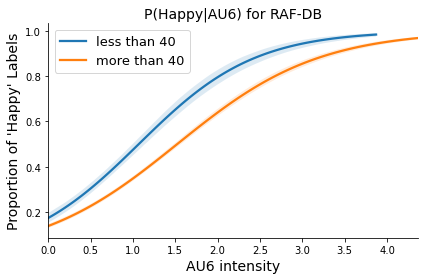

In [57]:
sns.lmplot(x='AU06_r', y='Happy', data=frame, hue = 'Age', logistic=True, scatter = False, hue_order = ['less than 40', 'more than 40'], legend=False, height=4, aspect=6/4)
plt.legend(fontsize=13)
plt.xlabel("AU6 intensity", fontsize=14)
plt.ylabel("Proportion of 'Happy' Labels", fontsize=14)
plt.title('P(Happy|AU6) for RAF-DB', fontsize=14)
plt.tight_layout()
plt.savefig('age_race_bias_plots/age_2_groups_graphs/RAFDB_happy_2_AU6.pdf')
plt.show()

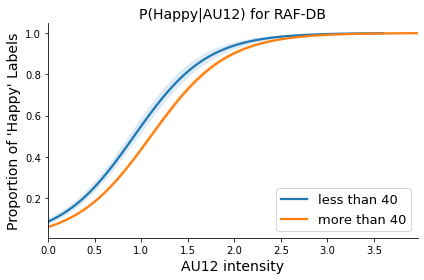

In [58]:
sns.lmplot(x='AU12_r', y='Happy', data=frame, hue = 'Age', logistic=True, scatter = False, hue_order = ['less than 40', 'more than 40'], legend=False, height=4, aspect=6/4)
plt.legend(fontsize=13)
plt.xlabel("AU12 intensity", fontsize=14)
plt.ylabel("Proportion of 'Happy' Labels", fontsize=14)
plt.title('P(Happy|AU12) for RAF-DB', fontsize=14)
plt.tight_layout()
plt.savefig('age_race_bias_plots/age_2_groups_graphs/RAFDB_happy_2_AU12.pdf')
plt.show()

In [76]:
formula = 'Happy ~ AU06_r + AU12_r + Age'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                12214
Model:                            GLM   Df Residuals:                    12210
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4499.7
Date:                Sat, 07 Aug 2021   Deviance:                       8999.4
Time:                        19:56:13   Pearson chi2:                 1.19e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.1540    

# AffectNet Manual

In [142]:
frame = pd.read_csv('AffectNet_Manual_OpenFace_result_with_expression_gender_race_age.csv')
print(frame.shape)
frame.head()

(35694, 59)


,ImageName,Expression,Happy,race_preds,gender_preds,age_preds,race_scores,gender_scores,age_scores,face,...,AU05_r_c,AU06_r_c,AU09_r_c,AU10_r_c,AU12_r_c,AU15_r_c,AU17_r_c,AU20_r_c,AU25_r_c,AU26_r_c
0,0002074f0d5dafbb7983d509964312d04c612d9d425577...,10,0,White,Female,60-69,[0.425075 0.02112318 0.25978056 0.00382649 0...,[0.09870926 0.9012907 ],[5.3278323e-05 5.1294203e-04 3.1685282e-03 2.4...,0,...,0,0,0,1,0,0,0,0,1,0
1,000bdb0a8f54725d1424bb38d626b1d8bf17f001ad2406...,8,0,Black,Male,20-29,[3.52906886e-06 9.99552011e-01 1.59864125e-04 ...,[9.9954259e-01 4.5739944e-04],[5.6344652e-07 4.1122996e-05 1.3004625e-02 6.6...,0,...,0,1,0,1,1,0,0,0,1,0
2,000c10a8f6735212d71eb54298bc47ea56dc08e64ed2ca...,0,0,White,Male,40-49,[9.3397456e-01 4.9433287e-04 3.7014667e-02 4.5...,[0.99797386 0.00202617],[8.6898144e-05 1.5486187e-04 2.0614783e-03 2.4...,0,...,0,0,0,1,0,0,0,0,0,0
3,000fb19bfc2f4d09e33b30ae5d1be4488297e7ff6f0011...,1,1,White,Male,40-49,[9.3484497e-01 2.3674322e-05 1.4515205e-02 1.9...,[9.9999887e-01 1.1556698e-06],[3.4171117e-06 7.4146001e-06 5.2725355e-04 4.3...,0,...,0,0,0,1,1,0,0,0,0,0
4,0010aaaebcdd6bae8f967dc0e471760f7a45e220125be3...,1,1,Middle Eastern,Male,20-29,[4.4076398e-02 7.8236350e-05 4.0029038e-02 3.7...,[9.9999958e-01 3.9027404e-07],[5.4735474e-06 8.7598469e-03 4.4977888e-01 4.5...,0,...,0,1,0,1,1,0,0,0,1,0


In [143]:
frame.age_preds.value_counts()

20-29           14527
30-39            5959
40-49            4495
50-59            3982
10-19            2066
60-69            2056
3-9              1204
0-2               771
more than 70      634
Name: age_preds, dtype: int64

In [144]:
frame = frame.dropna()
frame.shape

(35694, 59)

In [145]:
frame['AU6and12_c'] = frame.AU06_c.apply(int).apply(str) + frame.AU12_c.apply(int).apply(str)
frame.AU6and12_c.value_counts()

00    15395
11    12018
10     4277
01     4004
Name: AU6and12_c, dtype: int64

In [146]:
frame['AU6and12_r_c'] = frame.AU06_r_c.apply(str) + frame.AU12_r_c.apply(str)
frame.AU6and12_r_c.value_counts()

00    23289
01     6111
11     5431
10      863
Name: AU6and12_r_c, dtype: int64

In [147]:
print(list(frame.columns))

['ImageName', 'Expression', 'Happy', 'race_preds', 'gender_preds', 'age_preds', 'race_scores', 'gender_scores', 'age_scores', 'face', 'confidence', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r', 'AU01_r_c', 'AU02_r_c', 'AU04_r_c', 'AU05_r_c', 'AU06_r_c', 'AU09_r_c', 'AU10_r_c', 'AU12_r_c', 'AU15_r_c', 'AU17_r_c', 'AU20_r_c', 'AU25_r_c', 'AU26_r_c', 'AU6and12_c', 'AU6and12_r_c']


In [148]:
# age label
frame.loc[frame['age_preds'] == '0-2', 'age'] = 1
frame.loc[frame['age_preds'] == '3-9', 'age'] = 1
frame.loc[frame['age_preds'] == '10-19', 'age'] = 1
frame.loc[frame['age_preds'] == '20-29', 'age'] = 1
frame.loc[frame['age_preds'] == '30-39', 'age'] = 1
frame.loc[frame['age_preds'] == '40-49', 'age'] = 2
frame.loc[frame['age_preds'] == '50-59', 'age'] = 2
frame.loc[frame['age_preds'] == '60-69', 'age'] = 2
frame.loc[frame['age_preds'] == 'more than 70', 'age'] = 2
frame.age.value_counts()

1.0    24527
2.0    11167
Name: age, dtype: int64

In [149]:
frame['Age'] = frame['age'].apply(map_age)
frame.Age.value_counts()

less than 40    24527
more than 40    11167
Name: Age, dtype: int64

In [150]:
frame_1 = frame.loc[frame['age'] == 1]
frame_2 = frame.loc[frame['age'] == 2]
print(frame_1.shape)
print(frame_2.shape)

(24527, 63)
(11167, 63)


In [151]:
frame_list = [frame_1, frame_2]
name_list = ['less than 40', 'more than 40']

# P(expression|AU1, male) =? P(expression|AU1, female)

## Happiness

In [69]:
for i in range(len(frame_list)):
    print(frame_list[i].Happy.mean(), name_list[i], frame_list[i].shape[0])

0.32657887226322013 less than 40 24527
0.28163338407808725 more than 40 11167


In [70]:
for i in range(len(frame_list)):
    print(frame_list[i].AU06_r_c.mean(), name_list[i], frame_list[i].shape[0])

0.14824479145431566 less than 40 24527
0.2380227455896839 more than 40 11167


In [71]:
for i in range(len(frame_list)):
    print(frame_list[i].AU12_r_c.mean(), name_list[i], frame_list[i].shape[0])

0.3285766706079015 less than 40 24527
0.3119011372794842 more than 40 11167


In [72]:
for i in range(len(frame_list)):
    print(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index'), name_list[i], frame_list[i].shape[0])

Happy                0         1
AU6and12_r_c                    
00            0.888373  0.111627
01            0.294788  0.705212
10            0.727848  0.272152
11            0.162952  0.837048 less than 40 24527
Happy                0         1
AU6and12_r_c                    
00            0.921816  0.078184
01            0.416181  0.583819
10            0.760512  0.239488
11            0.216011  0.783989 more than 40 11167


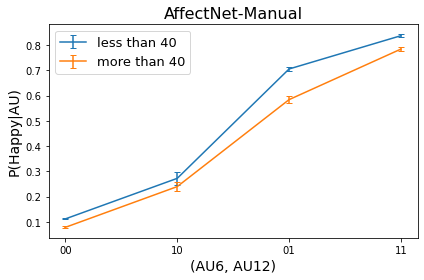

In [152]:
list_00 = []
list_01 = []
list_10 = []
list_11 = []

list_00_n = []
list_01_n = []
list_10_n = []
list_11_n = []

fig = plt.figure(figsize=(6,4))
ax = fig.gca()
for i in range(len(frame_list)):
    list_00.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['00',1])
    list_01.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['01',1])
    list_10.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['10',1])
    list_11.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['11',1])
    
    list_00_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['00','All'])
    list_01_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['01','All'])
    list_10_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['10','All'])
    list_11_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['11','All'])
    
result_df = pd.DataFrame({"00": list_00, "10": list_10, "01": list_01, "11": list_11,
                         "00_n": list_00_n, "10_n": list_10_n, "01_n": list_01_n, "11_n": list_11_n}, index = name_list)
result_df['00_std'] = np.sqrt(result_df['00'] * (1-result_df['00']) / result_df['00_n'])
result_df['10_std'] = np.sqrt(result_df['10'] * (1-result_df['10']) / result_df['10_n'])
result_df['01_std'] = np.sqrt(result_df['01'] * (1-result_df['01']) / result_df['01_n'])
result_df['11_std'] = np.sqrt(result_df['11'] * (1-result_df['11']) / result_df['11_n'])
result_df
for index, row in result_df.iterrows():
    plt.errorbar(list(result_df.columns)[:4], list(row)[:4], yerr = list(row)[8:], label = index, capsize = 3)
plt.legend(fontsize = 13)
plt.xlabel('(AU6, AU12)', fontsize = 14)
plt.ylabel('P(Happy|AU)', fontsize = 14)
plt.title('AffectNet-Manual', fontsize = 16)
plt.tight_layout()
plt.savefig('age_race_bias_plots/age_2_groups_graphs/AffectNet_Manual_happy_2_all.pdf')
plt.show()

In [74]:
result_df

,00,10,01,11,00_n,10_n,01_n,11_n,00_std,10_std,01_std,11_std
less than 40,0.111627,0.272152,0.705212,0.837048,16152,316,4739,3320,0.002478,0.025037,0.006623,0.006410
more than 40,0.078184,0.239488,0.583819,0.783989,7137,547,1372,2111,0.003178,0.018247,0.013308,0.008957


In [77]:
for AU_comb in ['00','10', '01', '11']:
    print(AU_comb)
    combined_df = pd.DataFrame()
    for i in range(len(frame_list)):
        combined_df = combined_df.append(pd.crosstab(frame_list[i][frame_list[i].AU6and12_r_c == AU_comb].age, frame_list[i][frame_list[i].AU6and12_r_c == AU_comb].Happy))
    combined_df
    combined_df["row_totals"] = combined_df[0] + combined_df[1]
    combined_df.loc["col_totals"] = combined_df.sum()
    combined_df
    observed = combined_df.iloc[0:-1,0:-1]   # Get table without totals for later use

    expected =  np.outer(combined_df["row_totals"][0:-1],
                     combined_df.loc["col_totals"][0:-1]) / combined_df.loc['col_totals', 'row_totals']

    expected = pd.DataFrame(expected)
    expected.columns = [0,1]
    expected.index = combined_df.index[:-1]

    if (expected>=5).sum().sum() == (combined_df.shape[0]-1) * (combined_df.shape[1]-1):
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df= (combined_df.shape[0]-2) * (combined_df.shape[1]-2))
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    print(p_value)
    print()

00
60.768403188110454
6.439293542825908e-15

10
1.1353398522157436
0.2866391981596187

01
71.81234933845984
0.0

11
24.240556758784784
8.502291992673605e-07



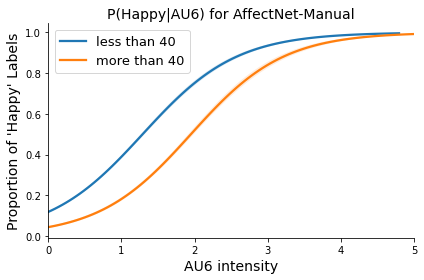

In [78]:
sns.lmplot(x='AU06_r', y='Happy', data=frame, hue = 'Age', logistic=True, scatter = False, hue_order = ['less than 40', 'more than 40'], legend=False, height=4, aspect=6/4)
plt.legend(fontsize=13)
plt.xlabel("AU6 intensity", fontsize=14)
plt.ylabel("Proportion of 'Happy' Labels", fontsize=14)
plt.title('P(Happy|AU6) for AffectNet-Manual', fontsize=14)
plt.tight_layout()
plt.savefig('age_race_bias_plots/age_2_groups_graphs/AffectNet_Manual_happy_2_AU6.pdf')
plt.show()

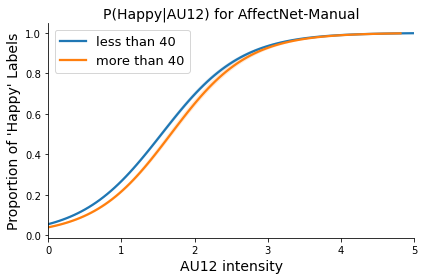

In [79]:
sns.lmplot(x='AU12_r', y='Happy', data=frame, hue = 'Age', logistic=True, scatter = False, hue_order = ['less than 40', 'more than 40'], legend=False, height=4, aspect=6/4)
plt.legend(fontsize=13)
plt.xlabel("AU12 intensity", fontsize=14)
plt.ylabel("Proportion of 'Happy' Labels", fontsize=14)
plt.title('P(Happy|AU12) for AffectNet-Manual', fontsize=14)
plt.tight_layout()
plt.savefig('age_race_bias_plots/age_2_groups_graphs/AffectNet_Manual_happy_2_AU12.pdf')
plt.show()

In [80]:
formula = 'Happy ~ AU06_r + AU12_r + Age'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                35694
Model:                            GLM   Df Residuals:                    35690
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12875.
Date:                Sun, 08 Aug 2021   Deviance:                       25750.
Time:                        23:23:20   Pearson chi2:                 3.67e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.8799    

# AffectNet Automatic

In [153]:
frame = pd.read_csv('AffectNet_Automatic_OpenFace_result_with_expression_gender_race_age.csv')
print(frame.shape)
frame.head()

(42284, 59)


,ImageName,Expression,Happy,race_preds,gender_preds,age_preds,race_scores,gender_scores,age_scores,face,...,AU05_r_c,AU06_r_c,AU09_r_c,AU10_r_c,AU12_r_c,AU15_r_c,AU17_r_c,AU20_r_c,AU25_r_c,AU26_r_c
0,0000278c7363d43c42a4db994a51e36aad351f55e77680...,10,0,White,Female,40-49,[9.7449505e-01 5.2814976e-06 5.5093807e-03 4.6...,[7.1670633e-04 9.9928331e-01],[2.2580596e-07 1.7767234e-06 2.0319392e-04 2.8...,0,...,0,0,0,1,0,0,0,0,1,0
1,0000fa4e4ffdc2a6042a0eadf8a2d067774705ba17721a...,10,0,East Asian,Female,20-29,[1.9185199e-01 7.3396941e-06 1.9742842e-03 7.8...,[6.5521155e-05 9.9993443e-01],[1.48235313e-06 3.44420609e-04 2.11575143e-02 ...,0,...,0,0,0,0,0,0,0,0,1,0
2,00017248a05758584faf54d4ccdb23d5365a5bfc3e3aee...,0,0,Black,Female,30-39,[2.06290515e-05 9.99178529e-01 1.19858145e-04 ...,[0.00982992 0.9901701 ],[1.80382315e-07 2.75580824e-05 3.95781221e-03 ...,0,...,0,0,0,0,0,0,0,0,0,0
3,000364dc26143c95e73e8dca30c0f3730db84c295c0b48...,1,1,East Asian,Female,20-29,[9.0016201e-03 2.3799853e-06 2.5050717e-03 9.5...,[6.7393144e-06 9.9999321e-01],[1.0476051e-07 6.7055156e-04 1.7963018e-01 8.1...,0,...,0,0,0,0,1,0,0,0,0,0
4,0003a7c1e380e87c864436434115f656c92b695e384f88...,10,0,White,Female,20-29,[0.60690844 0.01389638 0.2529639 0.00064708 0...,[0.00108382 0.9989162 ],[9.6977169e-07 3.5300865e-04 4.1254394e-02 6.1...,0,...,0,0,0,1,0,1,0,0,0,0


In [154]:
frame.age_preds.value_counts()

20-29           17646
30-39            6465
40-49            4580
50-59            3852
10-19            2724
3-9              2396
60-69            2099
0-2              1756
more than 70      766
Name: age_preds, dtype: int64

In [155]:
frame = frame.dropna()
frame.shape

(42284, 59)

In [156]:
frame['AU6and12_c'] = frame.AU06_c.apply(int).apply(str) + frame.AU12_c.apply(int).apply(str)
frame.AU6and12_c.value_counts()

00    18398
11    14291
01     5093
10     4502
Name: AU6and12_c, dtype: int64

In [157]:
frame['AU6and12_r_c'] = frame.AU06_r_c.apply(str) + frame.AU12_r_c.apply(str)
frame.AU6and12_r_c.value_counts()

00    27828
01     7198
11     6392
10      866
Name: AU6and12_r_c, dtype: int64

In [158]:
print(list(frame.columns))

['ImageName', 'Expression', 'Happy', 'race_preds', 'gender_preds', 'age_preds', 'race_scores', 'gender_scores', 'age_scores', 'face', 'confidence', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r', 'AU01_r_c', 'AU02_r_c', 'AU04_r_c', 'AU05_r_c', 'AU06_r_c', 'AU09_r_c', 'AU10_r_c', 'AU12_r_c', 'AU15_r_c', 'AU17_r_c', 'AU20_r_c', 'AU25_r_c', 'AU26_r_c', 'AU6and12_c', 'AU6and12_r_c']


In [159]:
# age label
frame.loc[frame['age_preds'] == '0-2', 'age'] = 1
frame.loc[frame['age_preds'] == '3-9', 'age'] = 1
frame.loc[frame['age_preds'] == '10-19', 'age'] = 1
frame.loc[frame['age_preds'] == '20-29', 'age'] = 1
frame.loc[frame['age_preds'] == '30-39', 'age'] = 1
frame.loc[frame['age_preds'] == '40-49', 'age'] = 2
frame.loc[frame['age_preds'] == '50-59', 'age'] = 2
frame.loc[frame['age_preds'] == '60-69', 'age'] = 2
frame.loc[frame['age_preds'] == 'more than 70', 'age'] = 2
frame.age.value_counts()

1.0    30987
2.0    11297
Name: age, dtype: int64

In [160]:
frame['Age'] = frame['age'].apply(map_age)
frame.Age.value_counts()

less than 40    30987
more than 40    11297
Name: Age, dtype: int64

In [161]:
frame_1 = frame.loc[frame['age'] == 1]
frame_2 = frame.loc[frame['age'] == 2]
print(frame_1.shape)
print(frame_2.shape)

(30987, 63)
(11297, 63)


In [162]:
frame_list = [frame_1, frame_2]
name_list = ['less than 40', 'more than 40']

# P(expression|AU1, male) =? P(expression|AU1, female)

## Happiness

In [91]:
for i in range(len(frame_list)):
    print(frame_list[i].Happy.mean(), name_list[i], frame_list[i].shape[0])

0.4263400780972666 less than 40 30987
0.39001504824289634 more than 40 11297


In [92]:
for i in range(len(frame_list)):
    print(frame_list[i].AU06_r_c.mean(), name_list[i], frame_list[i].shape[0])

0.1461580662858618 less than 40 30987
0.24156855802425423 more than 40 11297


In [93]:
for i in range(len(frame_list)):
    print(frame_list[i].AU12_r_c.mean(), name_list[i], frame_list[i].shape[0])

0.3270403717688063 less than 40 30987
0.30592192617509073 more than 40 11297


In [94]:
for i in range(len(frame_list)):
    print(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index'), name_list[i], frame_list[i].shape[0])

Happy                0         1
AU6and12_r_c                    
00            0.802031  0.197969
01            0.140084  0.859916
10            0.521622  0.478378
11            0.076461  0.923539 less than 40 30987
Happy                0         1
AU6and12_r_c                    
00            0.841797  0.158203
01            0.200327  0.799673
10            0.564516  0.435484
11            0.081953  0.918047 more than 40 11297


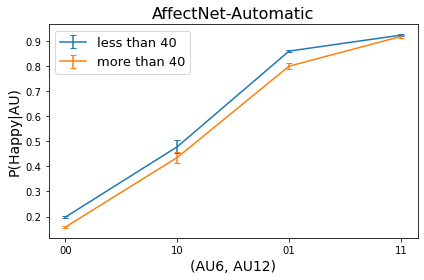

In [163]:
list_00 = []
list_01 = []
list_10 = []
list_11 = []

list_00_n = []
list_01_n = []
list_10_n = []
list_11_n = []

fig = plt.figure(figsize=(6,4))
ax = fig.gca()
for i in range(len(frame_list)):
    list_00.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['00',1])
    list_01.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['01',1])
    list_10.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['10',1])
    list_11.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, normalize = 'index').loc['11',1])
    
    list_00_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['00','All'])
    list_01_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['01','All'])
    list_10_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['10','All'])
    list_11_n.append(pd.crosstab(frame_list[i].AU6and12_r_c, frame_list[i].Happy, margins = True).loc['11','All'])
    
result_df = pd.DataFrame({"00": list_00, "10": list_10, "01": list_01, "11": list_11,
                         "00_n": list_00_n, "10_n": list_10_n, "01_n": list_01_n, "11_n": list_11_n}, index = name_list)
result_df['00_std'] = np.sqrt(result_df['00'] * (1-result_df['00']) / result_df['00_n'])
result_df['10_std'] = np.sqrt(result_df['10'] * (1-result_df['10']) / result_df['10_n'])
result_df['01_std'] = np.sqrt(result_df['01'] * (1-result_df['01']) / result_df['01_n'])
result_df['11_std'] = np.sqrt(result_df['11'] * (1-result_df['11']) / result_df['11_n'])
result_df
for index, row in result_df.iterrows():
    plt.errorbar(list(result_df.columns)[:4], list(row)[:4], yerr = list(row)[8:], label = index, capsize = 3)
plt.legend(fontsize = 13)
plt.xlabel('(AU6, AU12)', fontsize = 14)
plt.ylabel('P(Happy|AU)', fontsize = 14)
plt.title('AffectNet-Automatic', fontsize = 16)
plt.tight_layout()
plt.savefig('age_race_bias_plots/age_2_groups_graphs/AffectNet_Automatic_happy_2_all.pdf')
plt.show()

In [96]:
result_df

,00,10,01,11,00_n,10_n,01_n,11_n,00_std,10_std,01_std,11_std
less than 40,0.197969,0.478378,0.859916,0.923539,20483,370,5975,4159,0.002784,0.025969,0.004490,0.004121
more than 40,0.158203,0.435484,0.799673,0.918047,7345,496,1223,2233,0.004258,0.022263,0.011445,0.005805


In [97]:
result_df.loc['less than 40',:]-result_df.loc['more than 40',:]

00            0.039766
10            0.042895
01            0.060243
11            0.005492
00_n      13138.000000
10_n       -126.000000
01_n       4752.000000
11_n       1926.000000
00_std       -0.001474
10_std        0.003706
01_std       -0.006955
11_std       -0.001684
dtype: float64

In [99]:
for AU_comb in ['00','10', '01', '11']:
    print(AU_comb)
    combined_df = pd.DataFrame()
    for i in range(len(frame_list)):
        combined_df = combined_df.append(pd.crosstab(frame_list[i][frame_list[i].AU6and12_r_c == AU_comb].age, frame_list[i][frame_list[i].AU6and12_r_c == AU_comb].Happy))
    combined_df
    combined_df["row_totals"] = combined_df[0] + combined_df[1]
    combined_df.loc["col_totals"] = combined_df.sum()
    combined_df
    observed = combined_df.iloc[0:-1,0:-1]   # Get table without totals for later use

    expected =  np.outer(combined_df["row_totals"][0:-1],
                     combined_df.loc["col_totals"][0:-1]) / combined_df.loc['col_totals', 'row_totals']

    expected = pd.DataFrame(expected)
    expected.columns = [0,1]
    expected.index = combined_df.index[:-1]

    if (expected>=5).sum().sum() == (combined_df.shape[0]-1) * (combined_df.shape[1]-1):
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df= (combined_df.shape[0]-2) * (combined_df.shape[1]-2))
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    print(p_value)
    print()

00
56.12478429666862
6.80566714095221e-14

10
1.5730805856367793
0.20976020142754326

01
28.846967772327385
7.83284305194698e-08

11
0.6066299085411639
0.43605953813043363



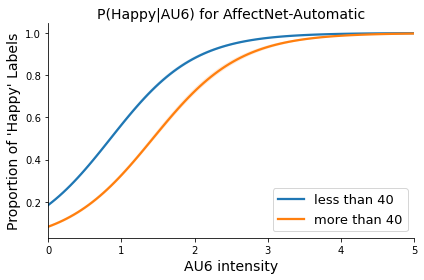

In [100]:
sns.lmplot(x='AU06_r', y='Happy', data=frame, hue = 'Age', logistic=True, scatter = False, hue_order = ['less than 40', 'more than 40'], legend=False, height=4, aspect=6/4)
plt.legend(fontsize=13)
plt.xlabel("AU6 intensity", fontsize=14)
plt.ylabel("Proportion of 'Happy' Labels", fontsize=14)
plt.title('P(Happy|AU6) for AffectNet-Automatic', fontsize=14)
plt.tight_layout()
plt.savefig('age_race_bias_plots/age_2_groups_graphs/AffectNet_Automatic_happy_2_AU6.pdf')
plt.show()

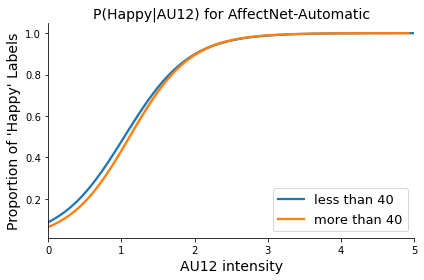

In [101]:
sns.lmplot(x='AU12_r', y='Happy', data=frame, hue = 'Age', logistic=True, scatter = False, hue_order = ['less than 40', 'more than 40'], legend=False, height=4, aspect=6/4)
plt.legend(fontsize=13)
plt.xlabel("AU12 intensity", fontsize=14)
plt.ylabel("Proportion of 'Happy' Labels", fontsize=14)
plt.title('P(Happy|AU12) for AffectNet-Automatic', fontsize=14)
plt.tight_layout()
plt.savefig('age_race_bias_plots/age_2_groups_graphs/AffectNet_Automatic_happy_2_AU12.pdf')
plt.show()

In [102]:
formula = 'Happy ~ AU06_r + AU12_r + Age'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Happy   No. Observations:                42284
Model:                            GLM   Df Residuals:                    42280
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15510.
Date:                Sun, 08 Aug 2021   Deviance:                       31020.
Time:                        23:24:36   Pearson chi2:                 7.39e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.3912    

# KDEF

In [116]:
frame = pd.read_csv('KDEF_OpenFace_result_with_Emotion_and_Gender.csv')
print(frame.shape)
frame.head()

(2926, 54)


,ImageName,face,confidence,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,...,AU10_r_c,AU12_r_c,AU15_r_c,AU17_r_c,AU20_r_c,AU25_r_c,AU26_r_c,Emotion,Happy,Gender
0,AF01AFHL.jpg,0,0.475,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0,0,1,0,0,0,0,AF,0,F
1,AF01AFHR.jpg,0,0.975,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,1,0,0,0,1,0,AF,0,F
2,AF01AFS.jpg,0,0.975,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1,1,0,0,0,1,0,AF,0,F
3,AF01ANHL.jpg,0,0.425,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,AN,0,F
4,AF01ANHR.jpg,0,0.575,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1,0,0,0,0,1,0,AN,0,F


In [117]:
frame = frame[frame.ImageName.apply(lambda x: x[6] == 'S')]
frame.shape

(974, 54)

In [118]:
print(list(frame.columns))

['ImageName', 'face', 'confidence', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r', 'AU01_r_c', 'AU02_r_c', 'AU04_r_c', 'AU05_r_c', 'AU06_r_c', 'AU09_r_c', 'AU10_r_c', 'AU12_r_c', 'AU15_r_c', 'AU17_r_c', 'AU20_r_c', 'AU25_r_c', 'AU26_r_c', 'Emotion', 'Happy', 'Gender']


In [119]:
frame = frame.rename(columns={'Gender': 'gender_preds'})

In [120]:
frame = frame.dropna()
frame.shape

(974, 54)

KDEF does not have age information.

# Chicago Face

In [121]:
frame = pd.read_csv('ChicagoFace_with_AU_cleanedup_with_age.csv')
print(frame.shape)
frame.head()

(1207, 56)


,ImageName,Gender,Race,age_preds,age_scores,Expression,face,confidence,AU01_r,AU02_r,...,AU05_r_c,AU06_r_c,AU09_r_c,AU10_r_c,AU12_r_c,AU15_r_c,AU17_r_c,AU20_r_c,AU25_r_c,AU26_r_c
0,CFD-WM-239-128-N.jpg,M,W,20-29,[0.00654973 0.1297859 0.2645277 0.3455049 0...,Neutral,0,0.975,0.00,0.00,...,0,0,0,1,0,0,0,0,1,0
1,CFD-BM-219-141-N.jpg,M,B,10-19,[3.3371706e-04 6.9808856e-02 4.1271898e-01 4.0...,Neutral,0,0.975,1.69,1.28,...,0,0,0,0,0,1,0,0,1,0
2,CFD-WF-034-016-A.jpg,F,W,10-19,[6.0925126e-04 1.1392238e-01 5.5542862e-01 2.6...,Angry,0,0.975,1.30,0.02,...,0,0,0,1,0,0,0,0,0,0
3,CFD-BM-030-065-F.jpg,M,B,3-9,[0.01531033 0.32719353 0.21216927 0.20949404 0...,Fear,0,0.975,2.90,4.65,...,0,0,0,1,1,0,0,0,1,0
4,CFD-LM-237-264-N.jpg,M,L,40-49,[0.00132091 0.04711869 0.14649853 0.13941625 0...,Neutral,0,0.975,1.01,0.21,...,0,0,0,1,0,0,0,0,0,0


In [122]:
frame['Angry'] = (frame['Expression'] =='Angry').astype(int)
frame['Fear'] = (frame['Expression'] == 'Fear').astype(int)
frame['Happy'] = (frame['Expression'] =='Happy').astype(int)
frame['Neutral'] = (frame['Expression'] == 'Neutral').astype(int)

In [123]:
frame['AU6and12_c'] = frame.AU06_c.apply(int).apply(str) + frame.AU12_c.apply(int).apply(str)
frame.AU6and12_c.value_counts()

00    650
11    345
01    158
10     54
Name: AU6and12_c, dtype: int64

In [124]:
frame['AU6and12_r_c'] = frame.AU06_r_c.apply(str) + frame.AU12_r_c.apply(str)
frame.AU6and12_r_c.value_counts()

00    784
11    274
01    136
10     13
Name: AU6and12_r_c, dtype: int64

In [125]:
frame.age_preds.value_counts()

20-29           676
10-19           422
3-9              69
40-49            19
30-39            14
60-69             6
more than 70      1
Name: age_preds, dtype: int64

In [126]:
# age label
frame.loc[frame['age_preds'] == '0-2', 'age'] = 1
frame.loc[frame['age_preds'] == '3-9', 'age'] = 1
frame.loc[frame['age_preds'] == '10-19', 'age'] = 1
frame.loc[frame['age_preds'] == '20-29', 'age'] = 1
frame.loc[frame['age_preds'] == '30-39', 'age'] = 1
frame.loc[frame['age_preds'] == '40-49', 'age'] = 2
frame.loc[frame['age_preds'] == '50-59', 'age'] = 2
frame.loc[frame['age_preds'] == '60-69', 'age'] = 2
frame.loc[frame['age_preds'] == 'more than 70', 'age'] = 2
frame.age.value_counts()

1.0    1181
2.0      26
Name: age, dtype: int64

In [127]:
frame['Age'] = frame['age'].apply(map_age)
frame.Age.value_counts()

less than 40    1181
more than 40      26
Name: Age, dtype: int64

CFD does not have enough data for age analysis.